# Gaussian processes

Generate a 1-d gaussian process

In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
from matplotlib import pyplot as plt

# Generate data
X = np.linspace(0,10,100).reshape(-1, 1)
y = np.squeeze(np.cos(X))
n_samples = 4

kernel = RBF(length_scale=1.0, length_scale_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel)

# Untrained Gaussian process
prior_mean_prediction, prior_std_prediction = gaussian_process.predict(X, return_std=True) 
prior_y = gaussian_process.sample_y(X,n_samples) # Sampling from prior Gaussian Process at X

# Generating training data
rng = np.random.RandomState(2)
training_indices = rng.choice(np.arange(y.size), size=5, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

# Fit training data
gaussian_process.fit(X_train, y_train)
posterior_mean_prediction, posterior_std_prediction = gaussian_process.predict(X, return_std=True)
posterior_y = gaussian_process.sample_y(X,n_samples)

Generate plots

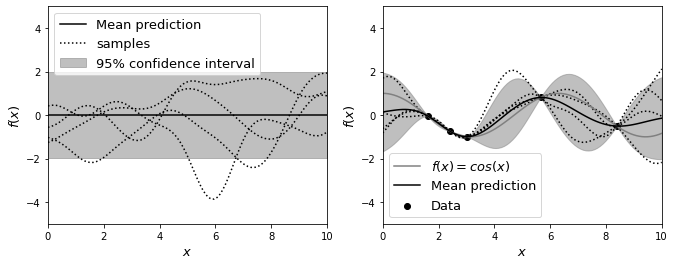

In [53]:
# Generate plots
fig, ax = plt.subplots(1,2,figsize=(11,4))

ax[0].plot(X, prior_mean_prediction, label="Mean prediction",color='black')
ax[0].fill_between(
    X.ravel(),
    prior_mean_prediction - 1.96 * prior_std_prediction,
    prior_mean_prediction + 1.96 * prior_std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
    color='gray'
)
for i in range(n_samples-1):
    ax[0].plot(X,prior_y[:,i],ls='dotted',color='black')
    ax[1].plot(X,posterior_y[:,i],ls='dotted',color='black')
ax[0].plot(X,prior_y[:,n_samples-1],label='samples',ls='dotted',color='black')
ax[1].plot(X,posterior_y[:,n_samples-1],ls='dotted',color='black')

ax[1].plot(X, y, label=r"$f(x) = cos(x)$", color='gray')
ax[1].scatter(X_train, y_train, label="Data",color='black')
ax[1].plot(X, posterior_mean_prediction, label="Mean prediction",color='black')
ax[1].fill_between(
    X.ravel(),
    posterior_mean_prediction - 1.96 * posterior_std_prediction,
    posterior_mean_prediction + 1.96 * posterior_std_prediction,
    alpha=0.5,
    #label=r"95% confidence interval",
    color='gray'
)

for i in range(2):
    ax[i].legend(fontsize=13)
    ax[i].set_xlabel("$x$",fontsize=13)
    ax[i].set_ylabel("$f(x)$",fontsize=13)
    ax[i].set_ylim([-5,5])
    ax[i].set_xlim([0,10])
    

plt.savefig("gaussian_process.pdf", bbox_inches='tight')

# Radial basis function kernel

Exploring the lenght scale effect on the gaussian process

In [57]:
# Generate data
X = np.linspace(0,5,100).reshape(-1, 1)
y = np.squeeze(0.5*X*np.sin(5*X))
X_train = np.linspace(0,5,10).reshape(-1, 1)
y_train = np.squeeze(0.5*X_train*np.sin(5*X_train))

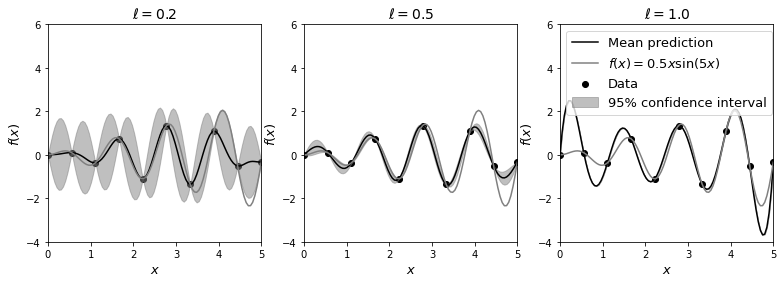

In [58]:
# Generate the plots

fig, ax = plt.subplots(1,3,figsize=(13,4))
for i,l in enumerate([0.2,0.5,1.0]):

    kernel = RBF(l,length_scale_bounds='fixed')
    gaussian_process = GaussianProcessRegressor(kernel=kernel)

    # Generating training data
    
    # Fit training data
    gaussian_process.fit(X_train, y_train)
    posterior_mean_prediction, posterior_std_prediction = gaussian_process.predict(X, return_std=True)
    
    ax[i].scatter(X_train, y_train, label="Data",color='black')
    ax[i].plot(X, posterior_mean_prediction,label='Mean prediction',color='black')
    ax[i].plot(X, y,label=r"$f(x)=0.5x\sin(5x)$",color='gray')
    ax[i].fill_between(
            X.ravel(),
            posterior_mean_prediction - 1.96 * posterior_std_prediction,
            posterior_mean_prediction + 1.96 * posterior_std_prediction,
            alpha=0.5,
            label=r"95% confidence interval",
            color='gray'
    )
    
    ax[i].set_xlabel("$x$",fontsize=13)
    ax[i].set_ylabel("$f(x)$",fontsize=13)
    ax[i].set_ylim([-4,6])
    ax[i].set_xlim([0,5])
    ax[i].set_title(f"$\ell = {l}$",fontsize=14)
ax[2].legend(fontsize=13)


plt.savefig("rbf_l.pdf", bbox_inches='tight')

# Matern kernel

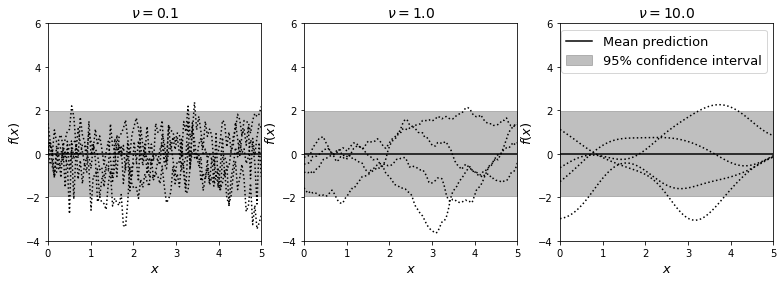

In [150]:
from sklearn.gaussian_process.kernels import Matern

# Generate data
X = np.linspace(0,5,100).reshape(-1, 1)
y = np.squeeze(0.5*X*np.sin(5*X))
X_train = np.linspace(0,5,10).reshape(-1, 1)
y_train = np.squeeze(0.5*X_train*np.sin(5*X_train))

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(13,4))
for i,l in enumerate([0.1,1.0,10.0]):

    kernel = Matern(length_scale=1.0, nu=l,length_scale_bounds='fixed')
    gaussian_process = GaussianProcessRegressor(kernel=kernel)

    posterior_mean_prediction, posterior_std_prediction = gaussian_process.predict(X, return_std=True)
    
    ax[i].plot(X, posterior_mean_prediction,label='Mean prediction',color='black')
    ax[i].fill_between(
            X.ravel(),
            posterior_mean_prediction - 1.96 * posterior_std_prediction,
            posterior_mean_prediction + 1.96 * posterior_std_prediction,
            alpha=0.5,
            label=r"95% confidence interval",
            color='gray'
    )
    
    posterior_y = gaussian_process.sample_y(X,n_samples)

    for j in range(n_samples):
        ax[i].plot(X,posterior_y[:,j],ls='dotted',color='black')
        
    ax[i].set_xlabel("$x$",fontsize=13)
    ax[i].set_ylabel("$f(x)$",fontsize=13)
    ax[i].set_ylim([-4,6])
    ax[i].set_xlim([0,5])
    ax[i].set_title(r"$\nu = $"+f"{l}",fontsize=14)
ax[2].legend(fontsize=13)


plt.savefig("matern_l.pdf", bbox_inches='tight')